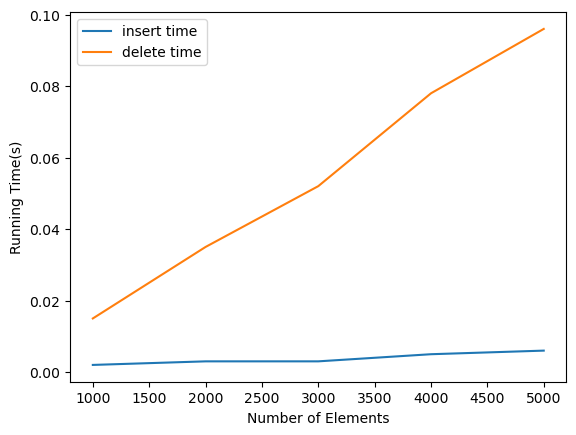

In [1]:
import time
from matplotlib import pyplot as plt
class Node:
    def __init__(self,key=None,next=None):
       self.key=key
       self.next=next
class BinaryTree:
    def __init__(self):
        self.root = None
        
    def get_parent(self, i):
        if i == 0:
            return None
        return (i - 1) // 2
    
    def get_left(self, i):
        return 2 * i + 1
    
    def get_right(self, i):
        return 2 * i + 2

class MinPriorityQueue:
    def __init__(self):
        self.data = []

    
    def __len__(self):
        return len(self.data)

    def insert(self, key):
        self.data.append(key)
        self.heapify_up(len(self.data) - 1)

    def heapify_up(self, index):
        if index == 0:
            return
        parent_index = BinaryTree().get_parent(index)
        if self.data[index] < self.data[parent_index]:
            self.data[index], self.data[parent_index] = self.data[parent_index], self.data[index]
            self.heapify_up(parent_index)

    
    def delMin(self):
        if len(self.data) == 0:
            return None
        
        self.data[0], self.data[len(self.data) - 1] = self.data[len(self.data) - 1], self.data[0]
        
        min = self.data.pop()
        self.heapify_down(0)
        return min

    
    def heapify_down(self, index):
        left_child_index = BinaryTree().get_left(index)
        right_child_index = BinaryTree().get_right(index)

        if left_child_index >= len(self.data):
            return
        smallest_index = index
        
        if self.data[left_child_index] < self.data[smallest_index]:
            smallest_index = left_child_index

        if right_child_index < len(self.data) and self.data[right_child_index] < self.data[smallest_index]:
            smallest_index = right_child_index

        if smallest_index != index:
            self.data[index], self.data[smallest_index] = self.data[smallest_index], self.data[index]
            self.heapify_down(smallest_index)


num_elements = [1000, 2000, 3000, 4000, 5000]
insert_time = []
delete_time = []

for num in num_elements:
    
    start_time = time.time()
    min_prior = MinPriorityQueue()
    for i in range(num):
        min_prior.insert(i)
    end_time = time.time()
    insert_time.append(end_time - start_time)
 
    start_time = time.time()
    for i in range(num):
        min_prior.delMin()
    end_time = time.time()
    delete_time.append(end_time - start_time)

plt.plot(num_elements, insert_time, label="insert time")
plt.plot(num_elements, delete_time, label="delete time")
plt.xlabel("Number of Elements")
plt.ylabel("Running Time(s)")
plt.legend()
plt.show()